In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
kobis = pd.read_csv("./datas/Rev1_kobis_movierev.csv", index_col=[0])

In [54]:
kobis['four_month'] = [(month%12 + 3)//3 for month in kobis['month']]
kobis

,Movie,Screen,Sales,Audience,Genre,Rate,month,year,AgeRate,Genre_1,four_month
1,명량,1587,135748398910,17613.682,사극,15세이상관람가,7,2014,1,11,3
2,극한직업,1978,139647979516,16264.944,코미디,15세이상관람가,1,2019,1,17,1
3,신과함께-죄와 벌,1912,115698654137,14410.754,판타지,12세이상관람가,12,2017,0,18,1
4,국제시장,966,110828014630,14245.998,드라마,12세이상관람가,12,2014,0,6,1
5,베테랑,1064,105024756250,13395.400,액션,15세이상관람가,8,2015,1,14,3
...,...,...,...,...,...,...,...,...,...,...,...
545,악녀의 시,5,123000,0.014,범죄,15세이상관람가,2,2016,1,10,1
546,마음,1,12000,0.002,드라마,15세이상관람가,7,2016,1,6,3
547,독고다이,1,1000,0.001,드라마,15세이상관람가,6,2019,1,6,3
548,어쩌다 옥탑방,1,1000,0.001,SF,15세이상관람가,4,2019,1,0,2


In [56]:
year = {'total_movie' : kobis.groupby('year').size(),
          'year_screen' : kobis.groupby('year')['Screen'].sum(),
          'year_sales' : kobis.groupby('year')['Sales'].sum(),
          'year_audience' : kobis.groupby('year')['Audience'].sum(),}
genre = {'total_genre' : kobis.groupby('Genre').size(),
            'genre_sales' : kobis.groupby('Genre')['Sales'].sum(),
            'genre_audience' : kobis.groupby('Genre')['Audience'].sum(),
            'genre_screen' : kobis.groupby('Genre')['Screen'].sum()}
season = {'total_movie' : kobis.groupby('four_month').size(),
          'season_screen' : kobis.groupby('four_month')['Screen'].sum(),
          'season_sales' : kobis.groupby('four_month')['Sales'].sum(),
          'season_audience' : kobis.groupby('four_month')['Audience'].sum(),}
year_df = pd.DataFrame(year)
genre_df = pd.DataFrame(genre)
season_df = pd.DataFrame(season)

In [34]:
year_df

,total_movie,year_screen,year_sales,year_audience
year,,,,
2013,65,32258,926590453723,129289.017
2014,68,28992,794368812653,103544.236
2015,73,37453,825174086485,105774.503
2016,70,41997,870859554653,109256.167
2017,66,48552,878972264283,110925.956
2018,79,54104,814247124184,97803.354
2019,80,60749,972651434584,115552.252
2020,48,30930,245899678880,28518.410


In [35]:
col = ['total_movie', 'year_screen', 'year_sales', 'year_audience']
year_df_norm = year_df[col] / year_df[col].max()
year_df_norm

,total_movie,year_screen,year_sales,year_audience
year,,,,
2013,0.8125,0.531005,0.952644,1.000000
2014,0.8500,0.477242,0.816705,0.800874
2015,0.9125,0.616520,0.848376,0.818124
2016,0.8750,0.691320,0.895346,0.845054
2017,0.8250,0.799223,0.903687,0.857969
2018,0.9875,0.890615,0.837142,0.756471
2019,1.0000,1.000000,1.000000,0.893751
2020,0.6000,0.509144,0.252814,0.220579


In [50]:
genre_df

,total_genre,genre_sales,genre_audience,genre_screen
Genre_1,,,,
0,4,71770710173,9914.564,2675
1,6,4850252998,645.240,1623
2,18,5173403200,478.928,778
3,19,55451431001,6922.513,6193
4,2,5573892210,651.084,812
5,15,16879996212,2141.734,1355
6,118,1514908375330,193191.896,78405
7,43,224447398326,28508.032,17796
8,4,220397800,15.414,94


In [57]:
col2 = ['total_genre', 'genre_sales', 'genre_audience', 'genre_screen']
genre_df_norm = genre_df[col2] / genre_df[col2].max()
genre_df_norm

,total_genre,genre_sales,genre_audience,genre_screen
Genre,,,,
SF,0.033898,0.047376,0.051320,0.034118
가족,0.050847,0.003202,0.003340,0.020700
공연,0.152542,0.003415,0.002479,0.009923
공포(호러),0.161017,0.036604,0.035832,0.078987
기타,0.016949,0.003679,0.003370,0.010356
다큐멘터리,0.127119,0.011143,0.011086,0.017282
드라마,1.000000,1.000000,1.000000,1.000000
멜로/로맨스,0.364407,0.148159,0.147563,0.226975
뮤지컬,0.033898,0.000145,0.000080,0.001199


In [10]:
col3 = ['total_movie', 'season_screen', 'season_sales', 'season_audience']
season_df_norm = season_df[col3] / season_df[col3].max()
season_df_norm

,total_movie,season_screen,season_sales,season_audience
four_month,,,,
1,0.913907,0.996117,0.939072,0.941200
2,0.821192,0.729742,0.415495,0.410332
3,0.900662,0.991589,1.000000,1.000000
4,1.000000,1.000000,0.670628,0.666828


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

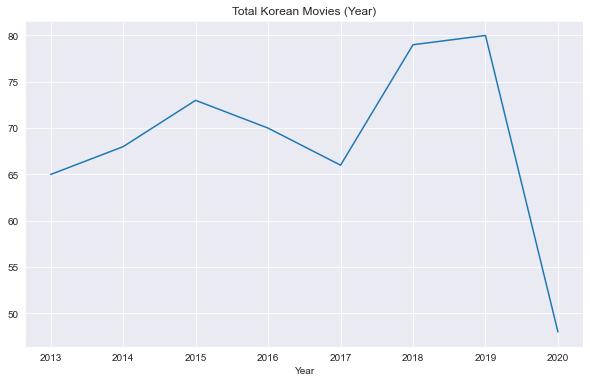

In [12]:
# 연도별 총 영화 개봉 수
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.title('Total Korean Movies (Year)')
plt.xlabel('Year')
plt.plot(kobis.groupby('year').size());

In [66]:
kobis[kobis['year'] == 2017].sort_values('Sales', ascending=False).head()

,Movie,Screen,Sales,Audience,Genre,Rate,month,year,AgeRate,Genre_1,four_month
3,신과함께-죄와 벌,1912,115698654137,14410.754,판타지,12세이상관람가,12,2017,0,18,1
9,택시운전사,1906,95284747049,12099.971,드라마,15세이상관람가,8,2017,1,6,3
22,1987,1299,58165581145,7231.638,드라마,15세이상관람가,12,2017,1,6,1
30,범죄도시,1315,56077813249,6851.297,범죄,청소년관람불가,10,2017,3,10,4
31,군함도,2027,50510565168,6592.151,액션,15세이상관람가,7,2017,1,14,3


In [65]:
kobis[kobis['year'] == 2020].sort_values('Sales', ascending=False).head()

,Movie,Screen,Sales,Audience,Genre,Rate,month,year,AgeRate,Genre_1,four_month
47,남산의 부장들,1659,41223596650,4750.104,드라마,15세이상관람가,1,2020,1,6,1
51,다만 악에서 구하소서,1997,38536886110,4350.041,범죄,15세이상관람가,8,2020,1,10,3
61,반도,2575,33067818280,3811.722,액션,15세이상관람가,7,2020,1,14,3
101,히트맨,1122,20614278000,2406.232,코미디,15세이상관람가,1,2020,1,17,1
119,#살아있다,1882,15965582900,1903.727,드라마,15세이상관람가,6,2020,1,6,3


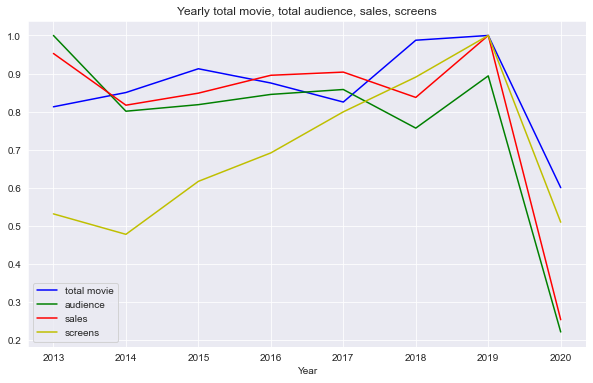

In [67]:
# 2013년과 2014년에 볼 수 있듯이 영화 개봉수가 증가하더라도 스크린수가 함께 증가하지는 않음
# 2017년에도 영화 개봉수는 2014년보다 적지만 스크린수는 더 많음
# 각 해의 총 매출과 총 관객수는 같은 현상으로 움직이는 것으로 보임 그러나 2018년에 보이듯이 영화 개봉수가 많더라도 총 매출과 관객수가 똑같이 증가하지 않음

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.title('Yearly total movie, total audience, sales, screens')
plt.xlabel('Year')
plt.plot(year_df_norm.groupby('year')['total_movie'].sum(), '-b', label='total movie')
plt.plot(year_df_norm.groupby('year')['year_audience'].sum(), '-g', label='audience')
plt.plot(year_df_norm.groupby('year')['year_sales'].sum(), '-r', label='sales')
plt.plot(year_df_norm.groupby('year')['year_screen'].sum(), '-y', label='screens')
plt.legend(loc='best');

In [42]:
import plotly.express as px

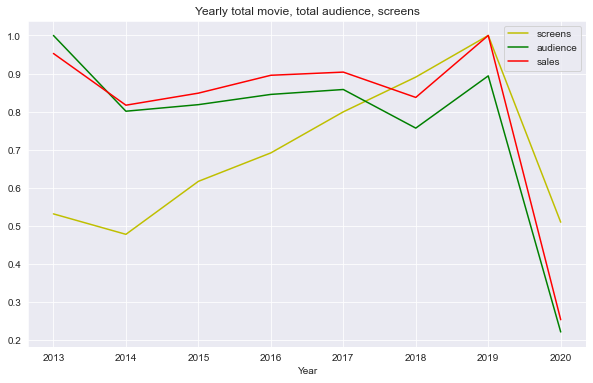

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.title('Yearly total movie, total audience, screens')
plt.xlabel('Year')
plt.plot(year_df_norm.groupby('year')['year_screen'].sum(), '-y', label='screens')
plt.plot(year_df_norm.groupby('year')['year_audience'].sum(), '-g', label='audience')
plt.plot(year_df_norm.groupby('year')['year_sales'].sum(), '-r', label='sales')
plt.legend(loc='best');

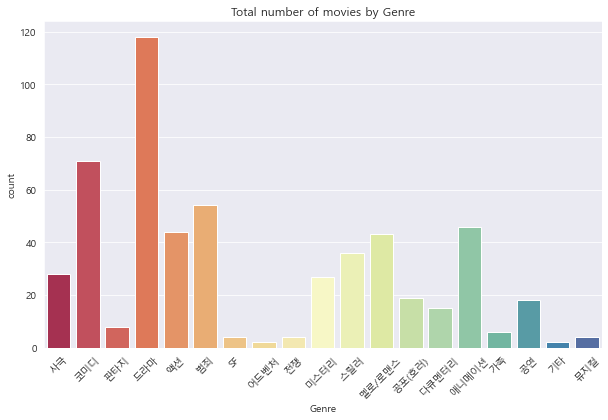

In [46]:
# 장르별 개봉한 총 영화 수 그래프
from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

plt.figure(figsize=(10,6))
plt.title('Total number of movies by Genre')
plt.xticks(fontsize=10, rotation=45)
sns.countplot(x='Genre', data=kobis, palette='Spectral');

In [59]:
genre_df_norm

,total_genre,genre_sales,genre_audience,genre_screen
Genre,,,,
SF,0.033898,0.047376,0.051320,0.034118
가족,0.050847,0.003202,0.003340,0.020700
공연,0.152542,0.003415,0.002479,0.009923
공포(호러),0.161017,0.036604,0.035832,0.078987
기타,0.016949,0.003679,0.003370,0.010356
다큐멘터리,0.127119,0.011143,0.011086,0.017282
드라마,1.000000,1.000000,1.000000,1.000000
멜로/로맨스,0.364407,0.148159,0.147563,0.226975
뮤지컬,0.033898,0.000145,0.000080,0.001199


In [28]:
from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

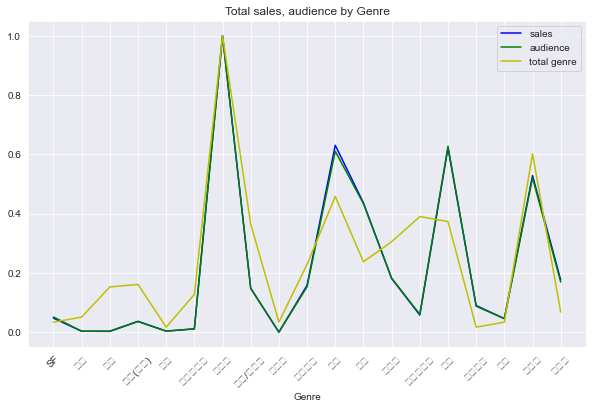

In [58]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.title('Total sales, audience by Genre')
plt.xlabel('Genre')
plt.plot(genre_df_norm['genre_sales'], '-b', label='sales')
plt.plot(genre_df_norm['genre_audience'], '-g', label='audience')
# plt.plot(genre_df_norm['genre_screen'], '-r', label='screen')
plt.plot(genre_df_norm['total_genre'], '-y', label='total genre')
plt.xticks(fontsize=10, rotation=45)
plt.legend(loc='best');

In [187]:
# sns.set_style('darkgrid')
# plt.figure(figsize=(10,6))
# plt.title('Yearly total movie, total audience, sales, screens')
# plt.xlabel('Season')
# plt.plot(season_df_norm.groupby('four_month')['total_movie'].sum(), '-b', label='total movie')
# plt.plot(season_df_norm.groupby('four_month')['season_audience'].sum(), '-g', label='audience')
# plt.plot(season_df_norm.groupby('four_month')['season_sales'].sum(), '-r', label='sales')
# plt.plot(season_df_norm.groupby('four_month')['season_screen'].sum(), '-y', label='screens')
# plt.legend(loc='best');

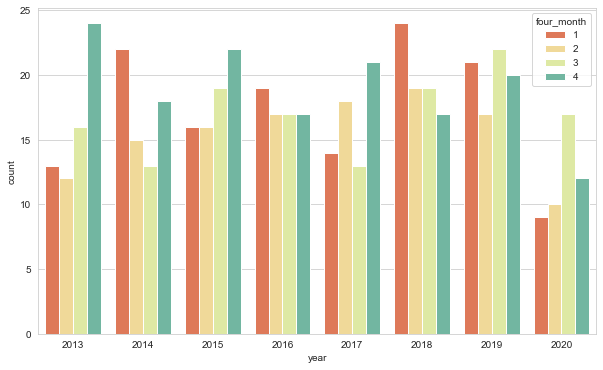

In [323]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='year', hue='four_month', data=kobis, palette='Spectral');

In [337]:
thirteen = kobis[kobis['year'] == 2013].groupby('Genre')[['Sales']].agg(['sum', 'count']).sort_values(by=('Sales', 'sum'), ascending=False)
fourteen = kobis[kobis['year'] == 2014].groupby('Genre')[['Sales']].agg(['sum', 'count']).sort_values(by=('Sales', 'sum'), ascending=False)
fifteen = kobis[kobis['year'] == 2015].groupby('Genre')[['Sales']].agg(['sum', 'count']).sort_values(by=('Sales', 'sum'), ascending=False)
sixteen = kobis[kobis['year'] == 2016].groupby('Genre')[['Sales']].agg(['sum', 'count']).sort_values(by=('Sales', 'sum'), ascending=False)
seventeen = kobis[kobis['year'] == 2017].groupby('Genre')[['Sales']].agg(['sum', 'count']).sort_values(by=('Sales', 'sum'), ascending=False)
eighteen = kobis[kobis['year'] == 2018].groupby('Genre')[['Sales']].agg(['sum', 'count']).sort_values(by=('Sales', 'sum'), ascending=False)
nineteen = kobis[kobis['year'] == 2019].groupby('Genre')[['Sales']].agg(['sum', 'count']).sort_values(by=('Sales', 'sum'), ascending=False)
twenty = kobis[kobis['year'] == 2020].groupby('Genre')[['Sales']].agg(['sum', 'count']).sort_values(by=('Sales', 'sum'), ascending=False)

In [335]:
kobis[kobis['year'] == 2019].groupby('Genre')[['Sales']].agg(['sum', 'count']).sort_values(by=('Sales', 'sum'), ascending=False)

Sales      
                 sum count
Genre                     
코미디     258729770363    10
드라마     223410040560    17
범죄      179972348206    10
사극       70114836469     4
어드벤처     69825366300     1
멜로/로맨스   35055771970     2
미스터리     33818274554     4
애니메이션    33369951880    10
공포(호러)   16985991347     6
판타지      16293580567     1
액션       11164437160     3
전쟁        8997921050     1
스릴러       8131086348     4
공연        3607839600     3
기타        2902500310     1
가족         245549900     1
뮤지컬         26167000     1
SF              1000     1

In [367]:
norm = round(nineteen['Sales', 'sum'] / nineteen['Sales', 'sum'].max(), 4)
norm2 = round(nineteen['Sales', 'count'] / nineteen['Sales', 'count'].max(), 4)
norm

Genre
코미디       1.0000
드라마       0.8635
범죄        0.6956
사극        0.2710
어드벤처      0.2699
멜로/로맨스    0.1355
미스터리      0.1307
애니메이션     0.1290
공포(호러)    0.0657
판타지       0.0630
액션        0.0432
전쟁        0.0348
스릴러       0.0314
공연        0.0139
기타        0.0112
가족        0.0009
뮤지컬       0.0001
SF        0.0000
Name: (Sales, sum), dtype: float64

In [370]:
import matplotlib

KeyError: 'Genre'

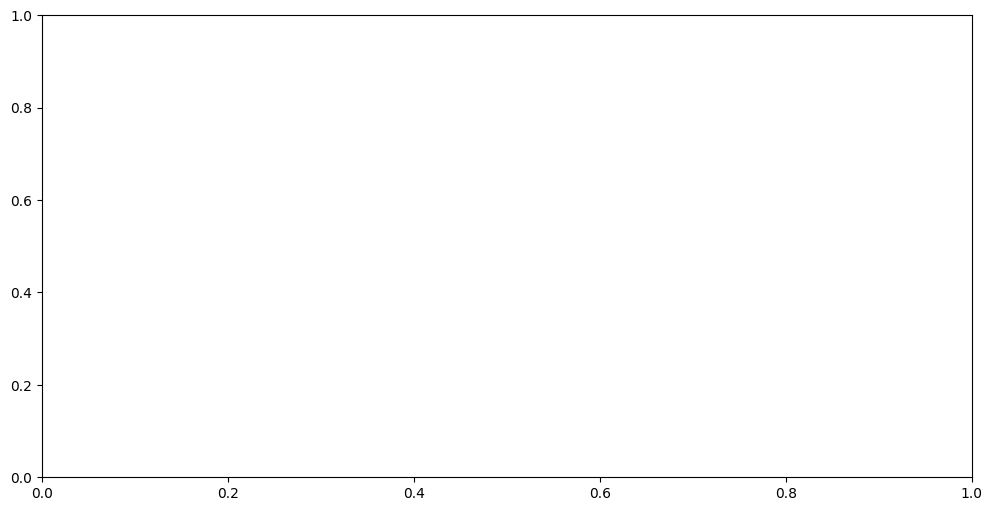

In [375]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data =norm2, x=nineteen['Genre'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = norm, alpha=0.5, ax=ax2)

In [237]:
!pip install squarify

In [238]:
import squarify

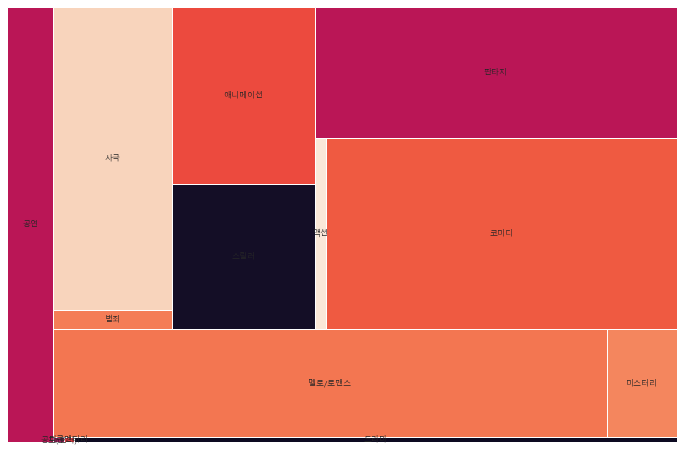

In [295]:
from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

name = list(kobis[kobis['year'] == 2020].groupby('Genre')['Sales'].sum().index.get_level_values(0))

plt.figure(figsize=(12,8))
squarify.plot(sizes=thirteen, label=name, text_kwargs={'fontsize':8})
plt.axis('off');

<AxesSubplot:ylabel='Sales'>

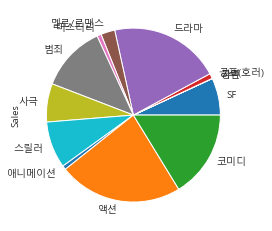

In [298]:
thirteen.plot.pie()

In [193]:
# winter = kobis[kobis['four_month'] == 1].head()
# spring = kobis[kobis['four_month'] == 2].head()
# summer = kobis[kobis['four_month'] == 3].head()
# fall = kobis[kobis['four_month'] == 4].head()

<Figure size 720x432 with 0 Axes>

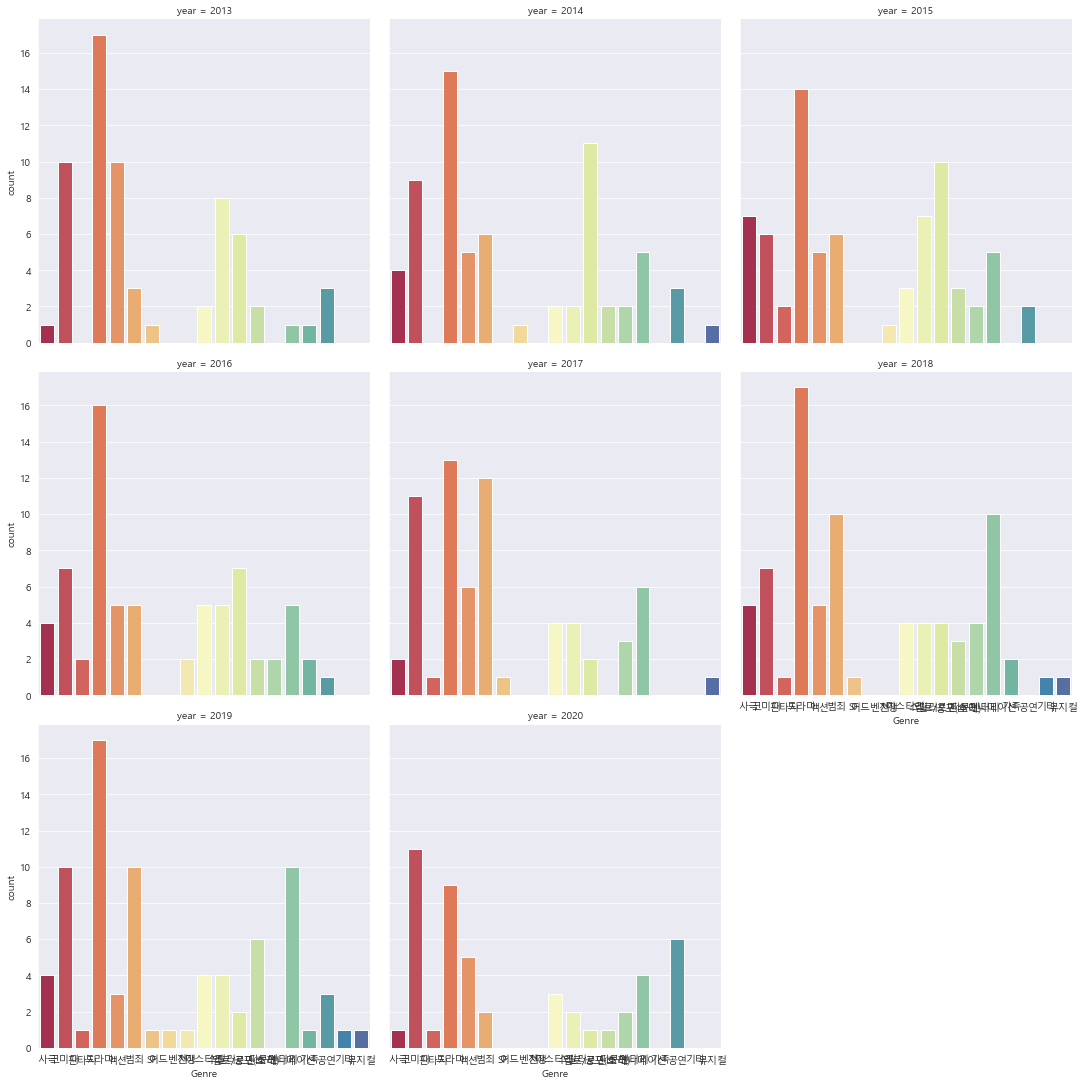

In [147]:
# 모든 해에 드라마 장르의 영화 개봉 수가 가장 많음

from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

plt.figure(figsize=(10,6))
sns.catplot(data=kobis, x='Genre', col='year', kind='count', 
            col_wrap=3, palette='Spectral', legend=False);